# Model

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [266]:
df = pd.read_pickle('dataframe_2.pkl')

In [267]:
df.head()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
0,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
2,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
3,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
4,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0


In [285]:
close = (df['close_elect'] == 1).sum()
not_close = (df['close_elect'] == 0).sum()

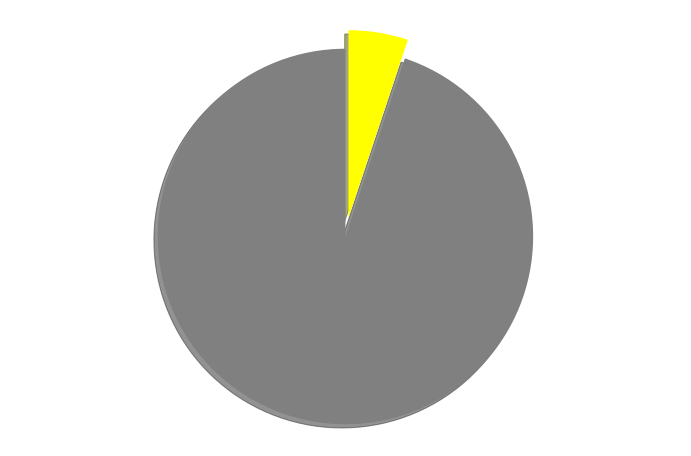

In [286]:
labels = ['Not Close', 'Close']
sizes = [not_close, close]
explode = (0, 0.1)

colors = ['grey','yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.savefig("pie.png")

In [287]:
# drop rows with nans

df = df.dropna()

In [288]:
# inspect mean values of features for not-close vs close outcomes

df.groupby('close_elect').mean()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate
close_elect,,,,,,,,,,,,,
0,97754.622861,0.673854,35383.793292,41.180151,40647.942847,49173.193018,4.611328,15.914203,85.657392,20.269884,251.164202,0.838362,0.088684
1,213686.159236,2.568153,77334.891720,38.888535,42207.388535,53773.019108,4.530573,15.549045,88.495541,27.620382,317.779807,0.760183,0.095176


In [289]:
df.mean()

population        103666.039298
growth                 0.770445
households         37522.904190
median_age            41.063300
per_cap_income     40727.459890
hh_income          49407.740825
unempl_rate            4.607210
poverty_rate          15.895583
hs_rate               85.802111
college_rate          20.644690
density              254.560970
white_rate             0.834376
hisp_rate              0.089015
close_elect            0.050991
dtype: float64

## Model Preprocessing
- Calculate null accuracy
- Define feature matrix and response vector
- Split data into test/train
- Scale feature (X) matricies

In [217]:
# baseline, null model accuracy - guess '0' every time

(df['close_elect'] == 0).sum() / len(df)

0.9490094186424164

In [218]:
# initialize feature matrix and observed outcome

X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [219]:
# test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [220]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

# transform test data
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

## PCA

Populating the interactive namespace from numpy and matplotlib


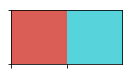

In [221]:
import seaborn as sns
%pylab inline

y_colors = sns.color_palette("hls", 2)
sns.palplot(y_colors)

In [222]:
from sklearn import decomposition

In [254]:
def plot_PCA_2D(data, target):

    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    pcafeatures = pca.transform(data)
    
    target_labels = ['Not Close', 'Close']
    
    #print(pca.components_)
    
    for i, label in enumerate(target_labels):
        plt.scatter(pcafeatures[target == i, 0], pcafeatures[target == i, 1],
                   c=y_colors[i], label=label, alpha=.75, edgecolors="none")
    xlabel("1st pricinple component", fontsize=18)
    ylabel("2nd pricinple component", fontsize=18)
    plt.title("PCA", fontsize=22)
    plt.xticks([])
    plt.yticks([])
    legend(fontsize=16)
    
    plt.savefig("pca.png")

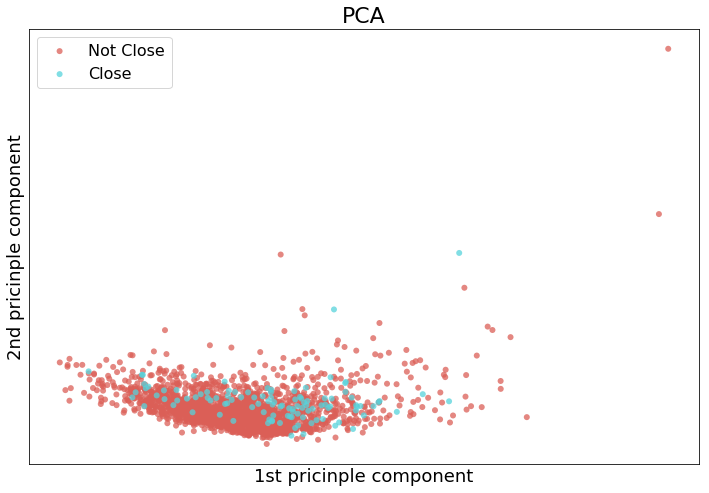

In [257]:
figsize(12,8)
plot_PCA_2D(X_train, y_train)

## Model Preprocessing

In [14]:
# test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# smote to increase underrepresented sampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [16]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_res)

# transform train data
X_train_trans = scaler.transform(X_res)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_mod = X_train_trans
y_train_mod = y_res

X_test_mod = X_test_trans
y_test_mod = y_test

# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train_trans = scaler.transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_mod = X_train_trans
y_train_mod = y_train

X_test_mod = X_test_trans
y_test_mod = y_test

In [102]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_mod, y_train_mod)
y_pred = logreg.predict(X_test_mod)

In [109]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.78      0.86       876
          1       0.13      0.60      0.21        48

avg / total       0.93      0.77      0.83       924



In [27]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[679, 197],
       [ 19,  29]])

In [106]:
y_scores = cross_val_predict(logreg, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.5427663734115347

In [85]:
y_prob_logreg = logreg.predict_proba(X_test_mod)[:,1]

In [86]:
logreg_p, logreg_r, logreg_t = precision_recall_curve(y_test_mod, y_prob_logreg)

In [140]:
# grid search

param_grid = {'C': np.logspace(-5, 5, 100)}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="recall")

In [141]:
best_model = grid_search.fit(X_train_mod, y_train_mod)

In [142]:
grid_search.best_params_

{'C': 0.7054802310718645}

In [143]:
logreg2 = LogisticRegression(C=0.7054802310718645)
logreg2.fit(X_train, y_train)
y_pred = logreg2.predict(X_test_mod)

<Container object of 13 artists>

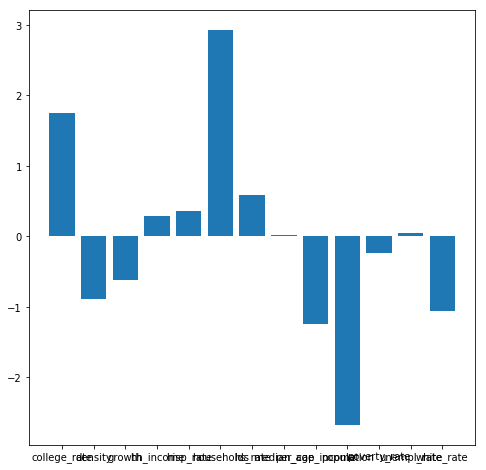

In [195]:
plt.bar(df.columns[0:-1], logreg.coef_[0])
plt.xlabels()

In [146]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.78      0.86       876
          1       0.11      0.52      0.19        48

avg / total       0.92      0.76      0.83       924



In [191]:
logreg2.coef_[0]

array([-5.26830931e-06, -4.12490307e-02,  1.70708571e-05, -4.25345569e-02,
       -8.15261734e-05,  2.40175809e-05,  7.85596774e-04, -1.40645425e-02,
       -1.55236754e-02,  1.04606570e-01, -2.39199019e-04, -4.59989507e-03,
       -3.40612247e-04])

In [189]:
df.columns[0:-1]

Index(['population', 'growth', 'households', 'median_age', 'per_cap_income',
       'hh_income', 'unempl_rate', 'poverty_rate', 'hs_rate', 'college_rate',
       'density', 'white_rate', 'hisp_rate'],
      dtype='object')

<Container object of 13 artists>

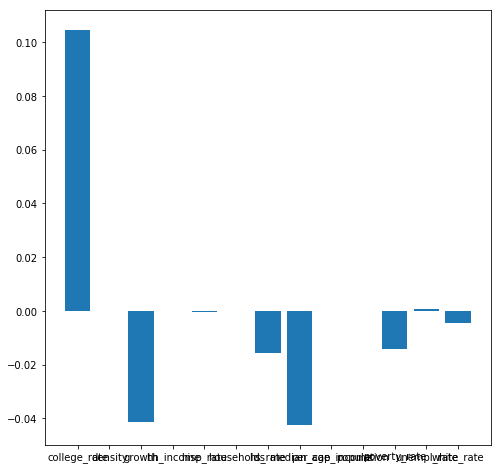

In [192]:
plt.bar(df.columns[0:-1], logreg2.coef_[0])

## SVM

In [40]:
from sklearn import svm

In [41]:
rbf_svm = svm.SVC(kernel='rbf', probability=True)
rbf_svm.fit(X_train_mod, y_train_mod)
y_pred = rbf_svm.predict(X_test_mod)

In [42]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.90       876
          1       0.15      0.56      0.24        48

avg / total       0.93      0.82      0.86       924



In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[728, 148],
       [ 21,  27]])

In [44]:
y_scores = cross_val_predict(rbf_svm, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.5786901270772239

In [87]:
y_prob_svm = rbf_svm.predict_proba(X_test_mod)[:,1]

In [89]:
rbf_svm_p, rbf_svm_r, rbf_svm_t = precision_recall_curve(y_test_mod, y_prob_svm)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [47]:
# search for an optimal value of K for KNN

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_mod, y_train_mod)
y_pred = knn.predict(X_test_mod)

In [48]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83       876
          1       0.13      0.73      0.21        48

avg / total       0.94      0.72      0.80       924



In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[633, 243],
       [ 13,  35]])

In [50]:
y_scores = cross_val_predict(knn, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.6307429130009775

In [284]:
y_prob_knn = knn.predict_proba(X_test_mod)[:,1]

In [91]:
knn_p, knn_r, knn_t = precision_recall_curve(y_test_mod, y_prob_knn)

In [44]:
from sklearn.model_selection import GridSearchCV

In [84]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

In [85]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall')
grid.fit(X_train_mod, y_train_mod)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [86]:
print(grid.best_score_)
print(grid.best_params_)

0.9941348973607038
{'n_neighbors': 5}


In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_mod, y_train_mod)
y_pred = knn.predict(X_test_mod)

In [88]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.79      0.87       876
          1       0.12      0.54      0.20        48

avg / total       0.93      0.78      0.84       924



## Random Forest

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_mod, y_train_mod)
y_pred = random_forest.predict(X_test_mod)

In [262]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94       876
          1       0.13      0.19      0.15        48

avg / total       0.91      0.89      0.90       924



In [263]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[814,  62],
       [ 39,   9]])

In [264]:
y_scores = cross_val_predict(random_forest, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.5112414467253177

In [92]:
y_prob_random_forest = random_forest.predict_proba(X_test_mod)[:, 1]

In [93]:
random_forest_p, random_forest_r, random_forest_t = precision_recall_curve(y_test_mod, y_prob_random_forest)

In [178]:
# grid-search

param_grid = {'n_estimators': range(20, 40), 'max_features': np.linspace(1, 40, 1)}
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring="recall")

In [179]:
best_model = grid_search.fit(X_train_mod, y_train_mod)

In [180]:
grid_search.best_params_

{'max_features': 1.0, 'n_estimators': 33}

In [181]:
rf2 = RandomForestClassifier(max_features=1, n_estimators=33)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test_mod)

In [182]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
random_forest.feature_importances_

array([0.0959552 , 0.05756425, 0.08459062, 0.04226979, 0.0557679 ,
       0.06070618, 0.04870465, 0.06210336, 0.06016775, 0.15300364,
       0.08078879, 0.15566586, 0.04271202])

In [187]:
list(zip(df.columns[0:-1], random_forest.feature_importances_))

[('population', 0.09595519945152745),
 ('growth', 0.05756424745802885),
 ('households', 0.08459061528609149),
 ('median_age', 0.042269785609668584),
 ('per_cap_income', 0.055767903023828794),
 ('hh_income', 0.06070618248165849),
 ('unempl_rate', 0.048704648555357895),
 ('poverty_rate', 0.062103356361851825),
 ('hs_rate', 0.06016774787806378),
 ('college_rate', 0.1530036362448059),
 ('density', 0.0807887881843627),
 ('white_rate', 0.15566586495845866),
 ('hisp_rate', 0.04271202450629558)]

<Container object of 13 artists>

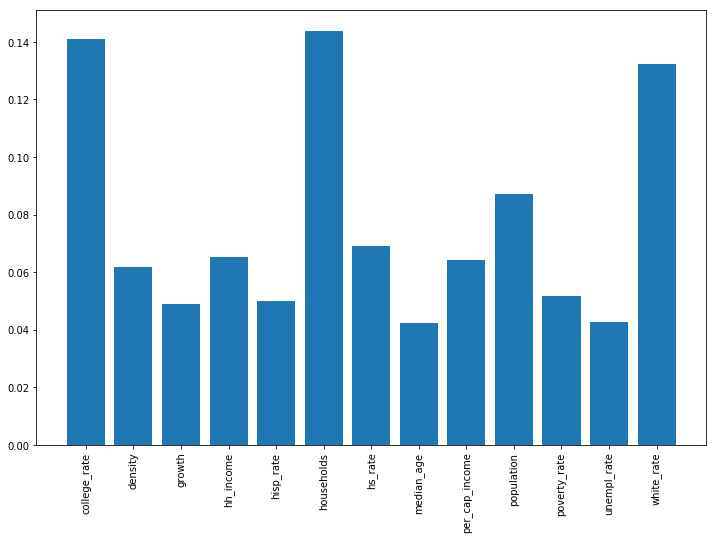

In [292]:
plt.xticks(rotation=90)
plt.bar(df.columns[0:-1], random_forest.feature_importances_)

## Gaussian-Bayes

In [58]:
from sklearn import naive_bayes, metrics

In [59]:
gb = naive_bayes.GaussianNB()
gb.fit(X_train_mod, y_train_mod)
y_pred = gb.predict(X_test_mod)

In [60]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.53      0.68       876
          1       0.08      0.73      0.14        48

avg / total       0.93      0.54      0.65       924



In [61]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[461, 415],
       [ 13,  35]])

In [63]:
y_scores = cross_val_predict(gb, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.6373411534701857

In [94]:
y_prob_gb = gb.predict_proba(X_test_mod)[:, 1]

In [95]:
gb_p, gb_r, random_forest_t = precision_recall_curve(y_test_mod, y_prob_gb)

## Precision-Recall Plot

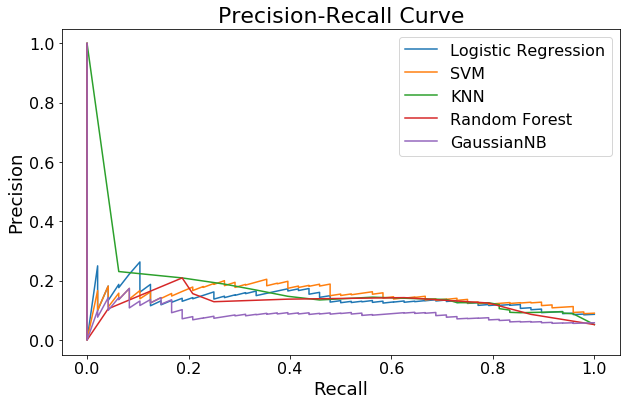

In [259]:
# plot P-R for all models

fig, ax = plt.subplots(figsize=(10, 6))

# Logisitic Regression
ax.plot(logreg_r, logreg_p, label='Logistic Regression')
# SVM
ax.plot(rbf_svm_r, rbf_svm_p, label='SVM')
# KNN
ax.plot(knn_r, knn_p, label='KNN')
# Random Forest
ax.plot(random_forest_r, random_forest_p, label='Random Forest')
# Gaussian-Bayes
ax.plot(gb_r, gb_p, label='GaussianNB')

# ax.set_xlim(0, 1.01)
# ax.set_ylim(0, 1)
ax.set_title('Precision-Recall Curve', fontsize=22)
ax.set_ylabel('Precision', fontsize=18)
ax.set_xlabel('Recall', fontsize=18)
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.show()
fig.savefig("prcurve.png")

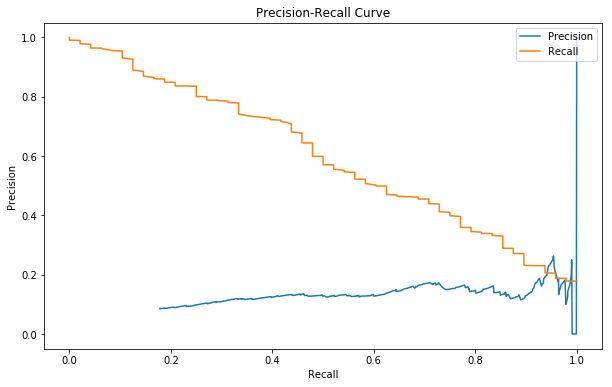

In [203]:
# plot P-R for all models

fig, ax = plt.subplots(figsize=(10, 6))

# Logisitic Regression
logreg_t=np.vstack([logreg_t.reshape([-1,1]),1])
ax.plot(logreg_t, logreg_p, label='Precision')
ax.plot(logreg_r, logreg_t, label='Recall')
# SVM
#ax.plot(rbf_svm_r, rbf_svm_p, label='SVM')
# KNN
#ax.plot(knn_r, knn_p, label='KNN')
# Random Forest
#ax.plot(random_forest_r, random_forest_p, label='Random Forest')
# Gaussian-Bayes
#ax.plot(gb_r, gb_p, label='GaussianNB')

# ax.set_xlim(0, 1.01)
# ax.set_ylim(0, 1)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='upper right')

## ROC-AUC

In [74]:
from sklearn.metrics import roc_curve

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_logreg)

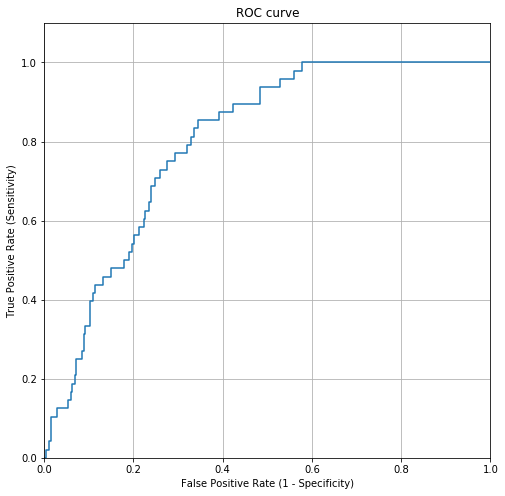

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_logreg)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
from sklearn.metrics import precision_recall_curve

In [87]:
p,r,t=precision_recall_curve(y_test,y_prob_logreg)
t=np.vstack([t.reshape([-1,1]),1])

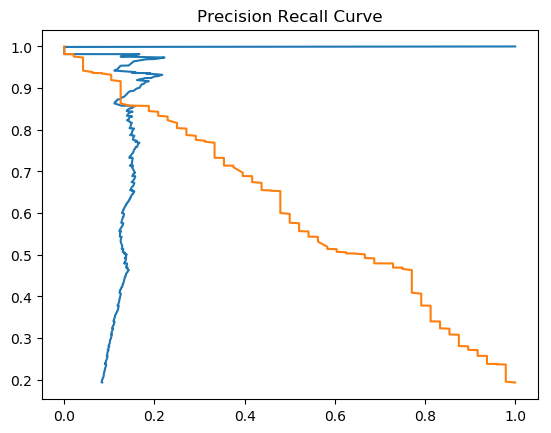

In [88]:

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve');

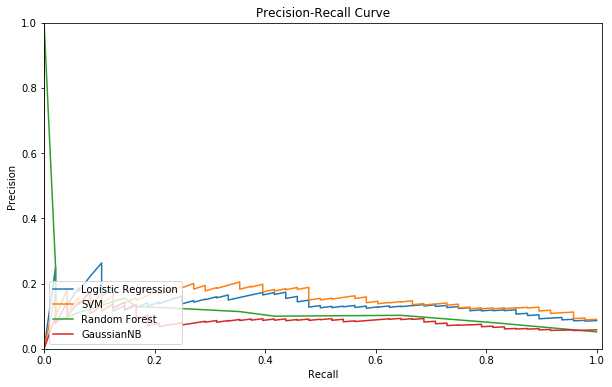

In [44]:
# plot learning curve

#plt.style.use('default')

fig, ax = plt.subplots(figsize=(10, 6))

# plot P-R for all models
p,r,t=precision_recall_curve(y_test, y_prob_logreg)
ax.plot(r, p, label='Logistic Regression')
p,r,t=precision_recall_curve(y_test, y_prob_svm)
ax.plot(r, p, label='SVM')
#p,r,t=precision_recall_curve(y_test, y_prob_knn)
#ax.plot(r, p, label='KNN')
p,r,t=precision_recall_curve(y_test, y_prob_random_forest)
ax.plot(r, p, label='Random Forest')
p,r,t=precision_recall_curve(y_test, y_prob_gb)
ax.plot(r, p, label='GaussianNB')

y_prob_gb

ax.set_xlim(0, 1.01)
ax.set_ylim(0, 1)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend(loc='lower left')

plt.show()

## Conclusion
Choose logistic regression has best recall and decent precision. More concerned with capturing all close counties. Logistic also provides parameter info.